In [67]:
import cv2
from skimage.filters import laplace,gaussian
from skimage.exposure import adjust_gamma 
from tensorflow.keras.models import load_model
from tensorflow.keras import backend
import skimage
import numpy as np
import matplotlib.pyplot as plt

In [3]:
model = load_model('Concrete_Crack.h5',compile = True)

In [4]:
def laplace_filter(img):
    return laplace(img)

In [5]:
def gaus(img):
    return (skimage.filters.gaussian(img,sigma=1,multichannel=False))

In [6]:
from skimage import data
from skimage import exposure
def exp(img):
    return skimage.exposure.adjust_gamma(img,1,11)

In [7]:
def our_preprocess(img):
     
    
    #img1 = gray(img)
    img1 = exp(img)
    img2 = gaus(img1)
    img3 = laplace_filter(img2)
    #img3 = sobel(img2)
   
    
    return img3

In [62]:
sam = 'img_1.jpg'

In [63]:
def prepare(filepath):
    img_array = cv2.imread(filepath)
    img_array = img_array / 255
    img_array = our_preprocess(img_array)
    new_array = cv2.resize(img_array, (128,128))
    return new_array.reshape(-1,128,128,3)

In [64]:
prediction = model.predict([prepare(sam)])
p=np.argmax(prediction)

In [65]:
print(prediction)

[[0.43446696 0.56553304]]


In [66]:
p

1

TypeError: Invalid shape () for image data

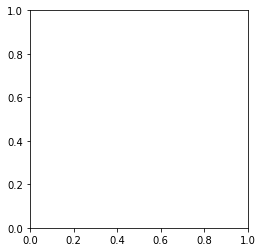